<a href="https://colab.research.google.com/github/RosuAndrei/Django-project/blob/main/Analiza_simpla___energie_electrica_vs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import librarii python utilizate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
# load the new file
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['date.csv']), header=0)


Saving date.csv to date.csv


In [ ]:
df

medii orare  Consum  Productie  Carbune  Hidrocarb.   Ape  Nucleara  \
0              1    5412       5077     1108        1003  1352      1359   
1              2    5179       5126     1141         999  1233      1359   
2              3    5030       5194     1110        1005  1097      1361   
3              4    4951       5273     1002        1008  1154      1363   
4              5    4944       5231      929        1010  1203      1362   
..           ...     ...        ...      ...         ...   ...       ...   
115          116    6560       6333     1055        1117  1900      1359   
116          117    6938       6322     1053        1145  2021      1360   
117          118    6744       6109     1036        1153  1782      1360   
118          119    6122       6214     1012        1126  1589      1360   
119          120    5608       6220      854        1056  1371      1361   

     Sold  Eoliana  Foto  Biocomb.  Stocare  frecventa  
0     334      222     0        34        0     50.008  
1      53      359     0        35        0     50.000  
2    -164      584     0        36        0     50.001  
3    -322      709     0        37        0     50.004  
4    -287      687     0        37        2     50.002  
..    ...      ...   ...       ...      ...        ...  
115   227      841    17        44        0     49.994  
116   616      693     0        46        4     49.992  
117   635      732     0        46        0     50.015  
118   -92     1081     0        44        0     50.021  
119  -613     1534     0        44        0     50.003  

[120 rows x 13 columns]

<Axes: >

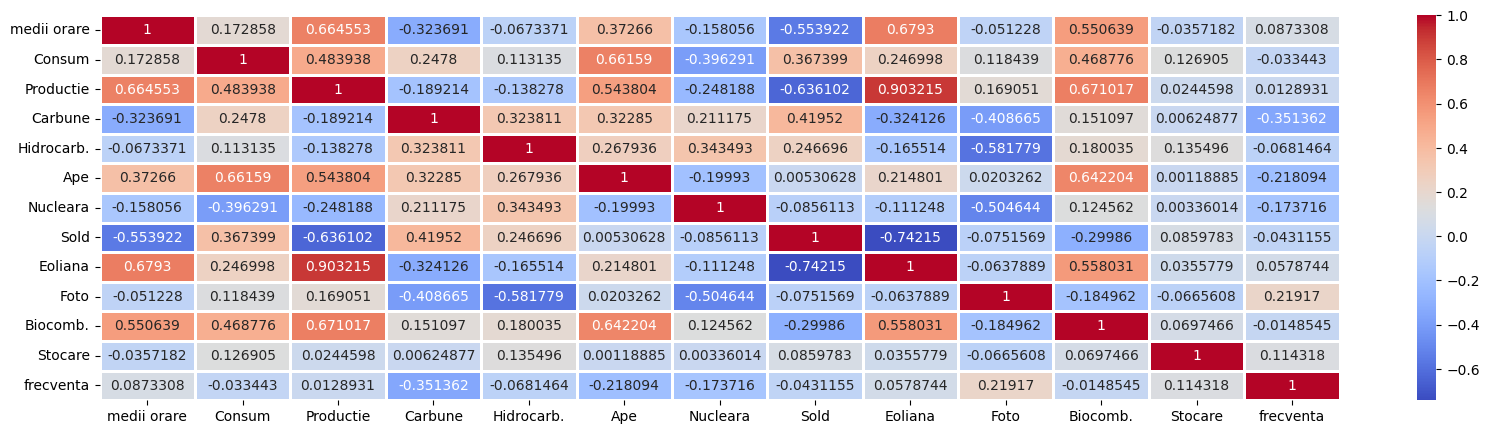

In [ ]:
%matplotlib inline
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(), annot = True, fmt='g', cmap= 'coolwarm', linewidths=.9)

In [ ]:
#descriere date statistice
df.describe()

medii orare       Consum    Productie      Carbune   Hidrocarb.  \
count   120.000000   120.000000   120.000000   120.000000   120.000000   
mean     60.500000  5574.583333  5682.183333   934.108333   993.200000   
std      34.785054   689.581283   831.251340   100.484523    69.886775   
min       1.000000  4414.000000  4524.000000   808.000000   681.000000   
25%      30.750000  4981.500000  5100.750000   850.750000   980.750000   
50%      60.500000  5579.000000  5388.000000   919.500000  1009.000000   
75%      90.250000  6189.250000  6245.500000  1024.000000  1022.250000   
max     120.000000  6938.000000  7587.000000  1199.000000  1153.000000   

               Ape     Nucleara         Sold      Eoliana        Foto  \
count   120.000000   120.000000   120.000000   120.000000  120.000000   
mean   1294.908333  1347.366667  -107.550000   857.150000  217.900000   
std     232.772006    18.946600   782.102304   762.488602  276.542622   
min     463.000000  1287.000000 -2241.000000    -1.000000    0.000000   
25%    1170.750000  1340.750000  -362.750000   260.000000    0.000000   
50%    1265.500000  1357.000000   -88.000000   632.500000   20.500000   
75%    1408.750000  1360.000000   415.250000  1277.750000  421.500000   
max    2021.000000  1366.000000  1594.000000  2407.000000  830.000000   

         Biocomb.     Stocare   frecventa  
count  120.000000  120.000000  120.000000  
mean    37.083333    0.450000   50.003667  
std      3.754176    0.818381    0.007635  
min     31.000000    0.000000   49.982000  
25%     35.000000    0.000000   49.999750  
50%     36.000000    0.000000   50.003000  
75%     39.250000    1.000000   50.007000  
max     46.000000    4.000000   50.036000

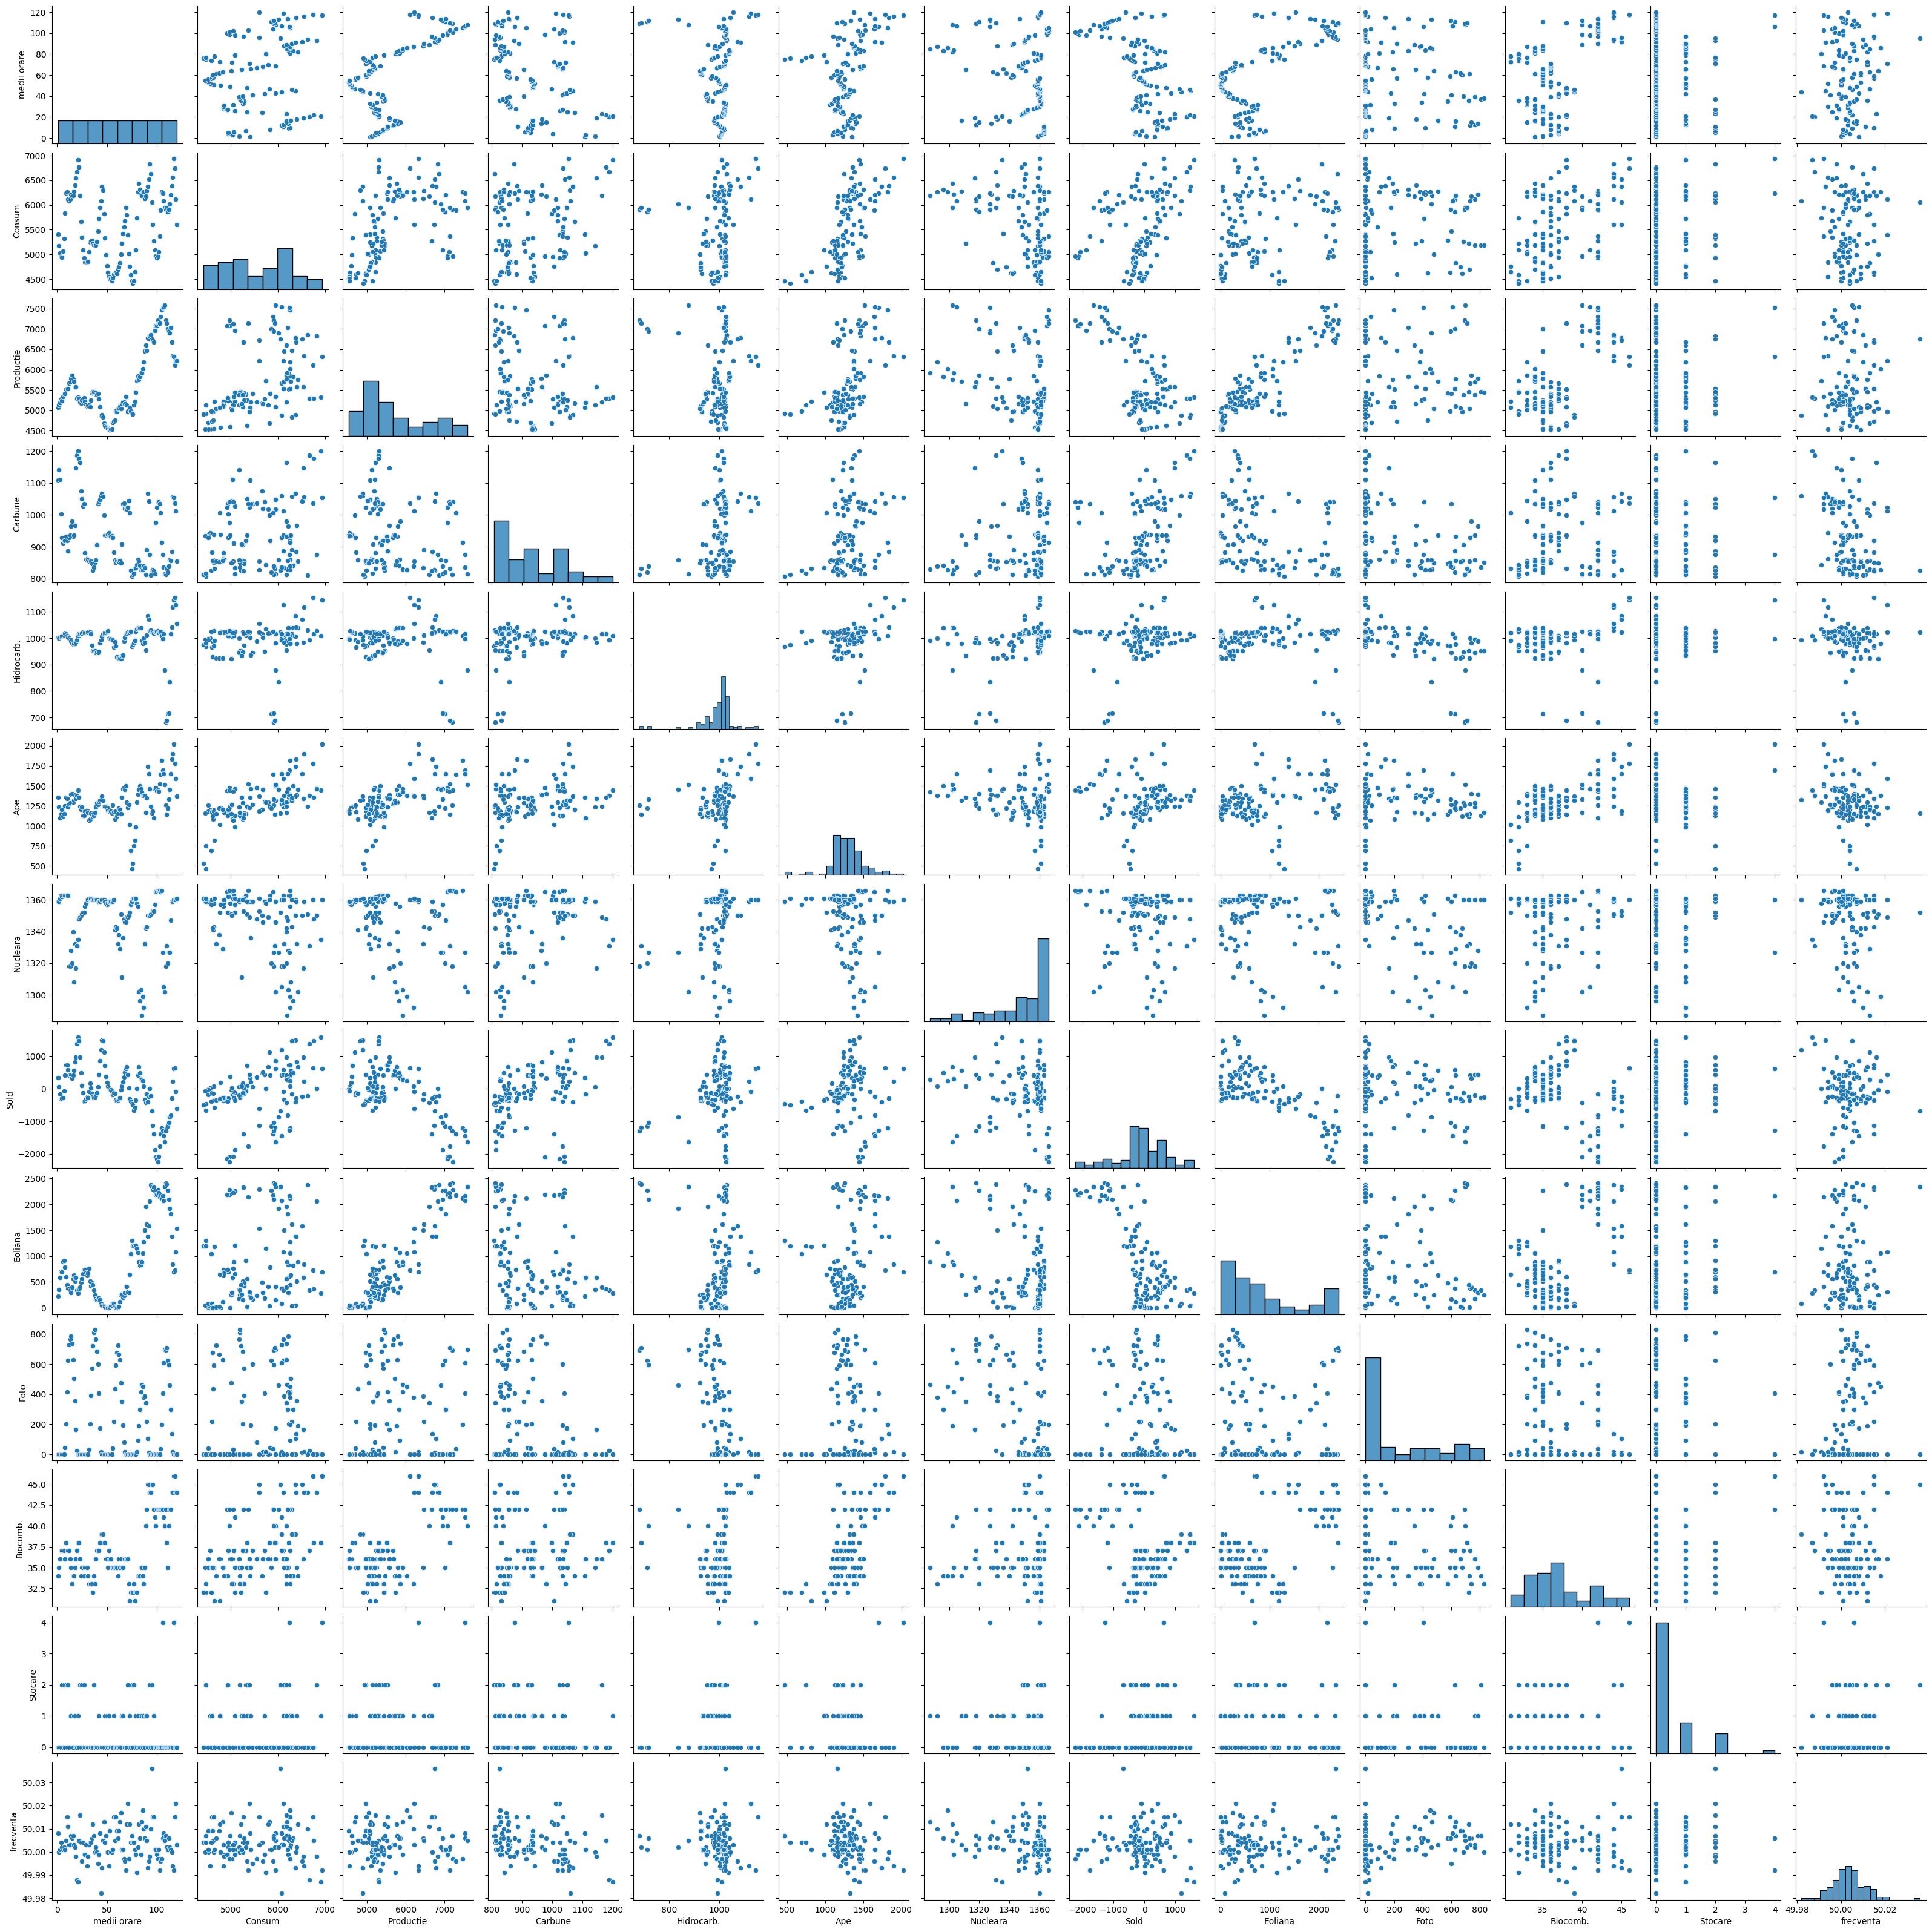

In [ ]:
#corelatii intre variabile
sns.pairplot(df)


In [ ]:
#definirea variabilei independente si variabila tinta
x=df[['Carbune','Hidrocarb.','Ape','Nucleara','Sold','Eoliana','Foto','Biocomb.']].values
y=df[['Productie']].values

In [ ]:
#impartirea setului de date in antrenare 70% si testare 30%
from array import array
from numpy import split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, shuffle=False)

In [ ]:
#evidentiere model liniar ols
import statsmodels.api as sm
x_stat=sm.add_constant(x_train)
regsummary=sm.OLS(y_train,x_stat).fit()
regsummary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.067e+06
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          2.58e-186
Time:                        19:24:24   Log-Likelihood:                -121.26
No. Observations:                  84   AIC:                             260.5
Df Residuals:                      75   BIC:                             282.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5985     13.957     -0.616      0.540     -36.402      19.206
x1             1.0020      0.002    543.405      0.000       0.998       1.006
x2             0.9953      0.006    159.316      0.000       0.983       1.008
x3             1.0015      0.001    937.241      0.000       0.999       1.004
x4             1.0053      0.009    105.830      0.000       0.986       1.024
x5            -0.0005      0.000     -1.257      0.213      -0.001       0.000
x6             1.0013      0.000   2042.804      0.000       1.000       1.002
x7             0.9997      0.001   1395.810      0.000       0.998       1.001
x8             1.0673      0.098     10.860      0.000       0.872       1.263
==============================================================================
Omnibus:                        5.803   Durbin-Watson:                   2.517
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.154
Skew:                           0.493   Prob(JB):                       0.0760
Kurtosis:                       3.707   Cond. No.                     2.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print("Adjusted R-Square: ",regsummary.rsquared_adj)
print("R-square : ",regsummary.rsquared)

Adjusted R-Square:  0.9999902723839119
R-square :  0.9999912099854625


In [ ]:
#realizarea modelului regresiei liniare
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#prognoza utilizand modelul creat mai sus cu lr
y_train_predict_RL=lr.predict(x_train)
print(y_train_predict_RL)

[[5078.63123661]
 [5126.91381478]
 [5194.08414819]
 [5274.25499554]
 [5229.12290672]
 [5334.21554517]
 [5397.20889147]
 [5418.83738802]
 [5510.72857549]
 [5529.36594606]
 [5533.09942062]
 [5667.06053148]
 [5689.98627368]
 [5789.14669549]
 [5856.2587396 ]
 [5771.38199188]
 [5713.31144125]
 [5574.44927388]
 [5571.78100309]
 [5293.56325119]
 [5316.53477847]
 [5301.55037805]
 [5208.50255797]
 [5177.50477531]
 [5252.84057558]
 [5221.8467217 ]
 [5311.02696335]
 [5215.88931574]
 [5142.75765492]
 [5101.68055637]
 [5120.62608244]
 [5131.39201746]
 [5079.94604984]
 [5245.98245288]
 [5422.24624793]
 [5457.12585533]
 [5461.1621297 ]
 [5437.02871377]
 [5378.29570907]
 [5379.5023062 ]
 [5409.69773006]
 [5286.63810645]
 [5079.42460328]
 [4880.27272744]
 [4889.1041201 ]
 [4829.95999812]
 [4691.80568083]
 [4625.87196341]
 [4601.86298767]
 [4583.89647959]
 [4558.84605346]
 [4537.14381275]
 [4525.08259692]
 [4542.11743069]
 [4535.06952094]
 [4694.29554713]
 [4722.1321447 ]
 [4761.5928515 ]
 [4977.8425191

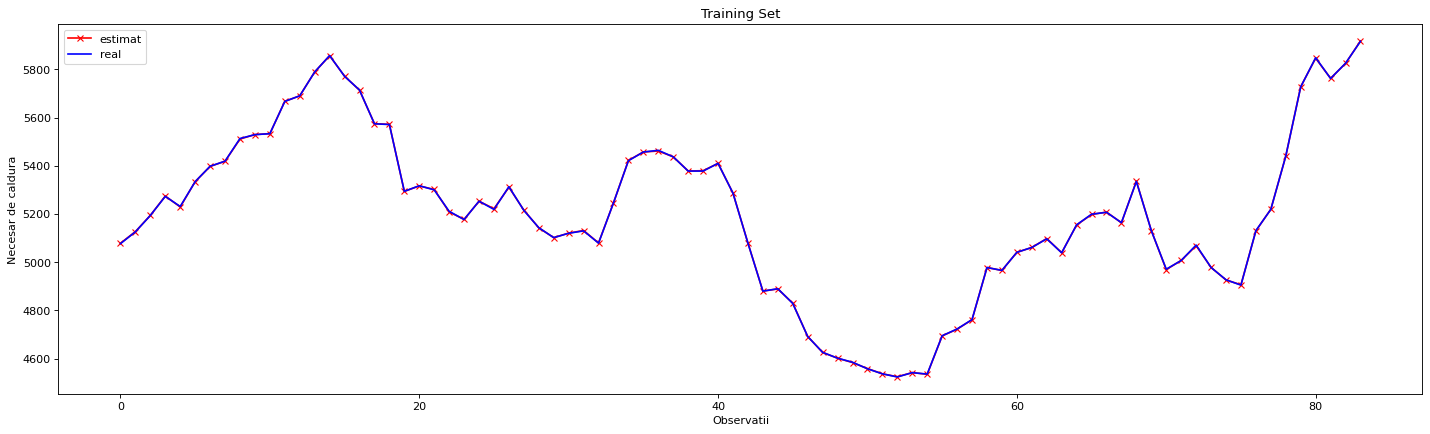

In [ ]:
#reprezentare grafica real cu estimat pe setul de antrenare
from matplotlib.pyplot import figure
figure(figsize=(22, 6), dpi=80)
#y_time=df2[['Date']]
plt.plot(y_train_predict_RL, label='estimat', color='red',marker='x')
plt.plot(y_train,label='real',color='blue')
plt.title('Training Set')
plt.xlabel('Observatii')
plt.ylabel('Necesar de caldura')
plt.legend()
plt.show()

In [ ]:
y_test_predict_RL=lr.predict(x_test)
y_train_predict_RL=lr.predict(x_train)
#print(y_test_predict_RL)

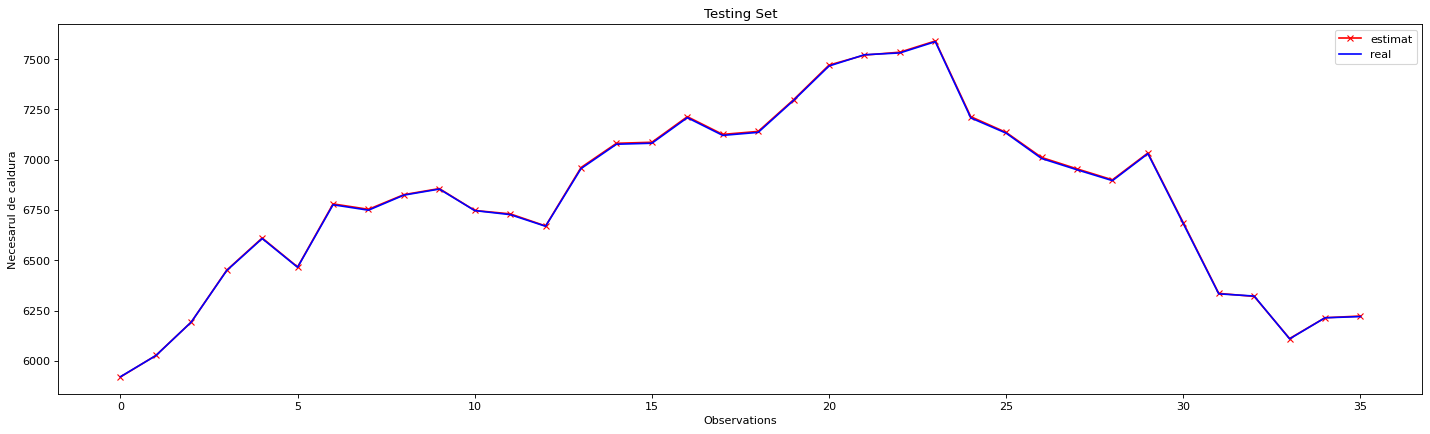

In [ ]:
#reprez grafica a rezultatului LR pe setul de testare
from matplotlib.pyplot import figure
figure(figsize=(22, 6), dpi=80)
plt.plot(y_test_predict_RL,label='estimat',color='red', marker='x')
plt.plot(y_test, label='real', color='blue')
plt.title('Testing Set')
plt.xlabel('Observations')
plt.ylabel('Necesarul de caldura')
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
print('Antrenare rezultate:')
print('Mean Squared Error (MSE) : ', metrics.mean_squared_error(y_train,y_train_predict_RL))
print('Mean Absolute Error (MAE) : ',metrics.mean_absolute_error(y_train,y_train_predict_RL))
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_train, y_train_predict_RL)),'.3f'))
print("Root Mean Squared Error (RMSE) : ",rmse)

Antrenare rezultate:
Mean Squared Error (MSE) :  1.0504922604810694
Mean Absolute Error (MAE) :  0.7672492917836389
Root Mean Squared Error (RMSE) :  1.025


In [ ]:
print('Testare rezultate:')
print('Mean Squared Error (MSE) : ', metrics.mean_squared_error(y_test,y_test_predict_RL))
print('Mean Absolute Error (MAE) : ',metrics.mean_absolute_error(y_test,y_test_predict_RL))
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_test_predict_RL)),'.3f'))
print("Root Mean Squared Error (RMSE) : ",rmse)

Testare rezultate:
Mean Squared Error (MSE) :  12.51548631214584
Mean Absolute Error (MAE) :  3.172521069560945
Root Mean Squared Error (RMSE) :  3.538


In [ ]:
# scikit-learn module pt Random Forest
from sklearn.model_selection import train_test_split # impartirea datelor la fel ca la LR
from sklearn.metrics import mean_squared_error # functia cost
from sklearn.ensemble import RandomForestRegressor # functia pentru RF pentru regresie

In [ ]:
# initializare cu n arbori
model = RandomForestRegressor(n_estimators =1000, random_state = 0)

# crearea modelul pe date
model.fit(x_train, y_train)

<ipython-input-22-5afd47cd0a20>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=0)

In [ ]:
# Predictia pentru antrenare si testare
y_pred_RF_test = model.predict(x_test)
y_pred_RF_train=model.predict(x_train)

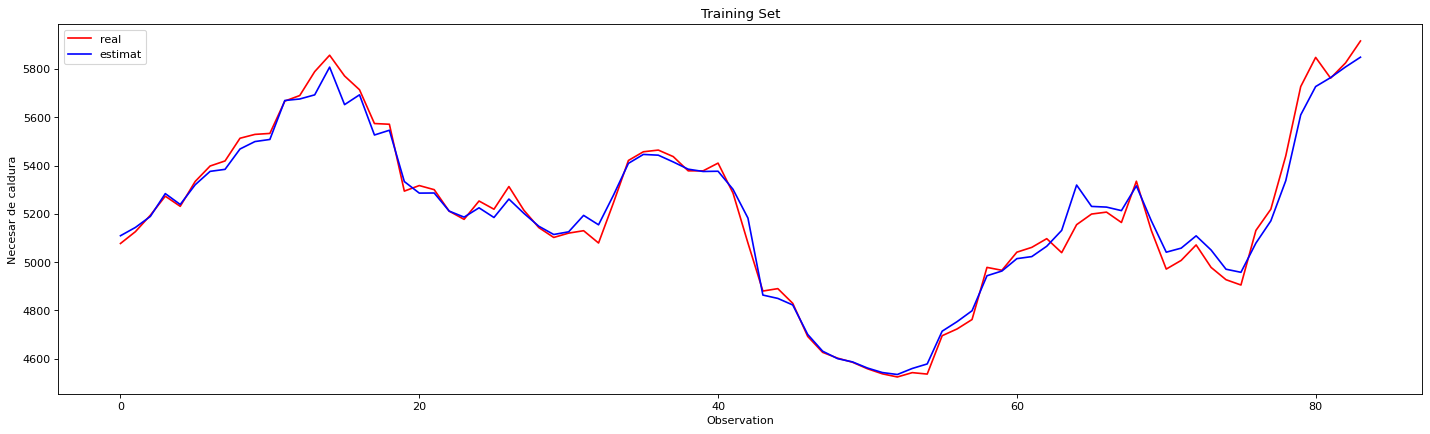

In [ ]:
figure(figsize=(22, 6), dpi=80)
plt.plot(y_train, label='real', color='red')
plt.plot(y_pred_RF_train,label='estimat',color='blue')
plt.title('Training Set')
plt.xlabel('Observation')
plt.ylabel('Necesar de caldura')
plt.legend()
plt.show()

In [ ]:
print("Rezultate RF Antrenare:")
print('Mean Squared Error (MSE) : ', metrics.mean_squared_error(y_train,y_pred_RF_train))
print('Mean Absolute Error (MAE) : ',metrics.mean_absolute_error(y_train,y_pred_RF_train))
rmse = float(format(np.sqrt(mean_squared_error(y_train, y_pred_RF_train)),'.3f'))
print("Root Mean Squared Error (RMSE) : ",rmse)

Rezultate RF Antrenare:
Mean Squared Error (MSE) :  2240.2186777261895
Mean Absolute Error (MAE) :  34.64501190476192
Root Mean Squared Error (RMSE) :  47.331


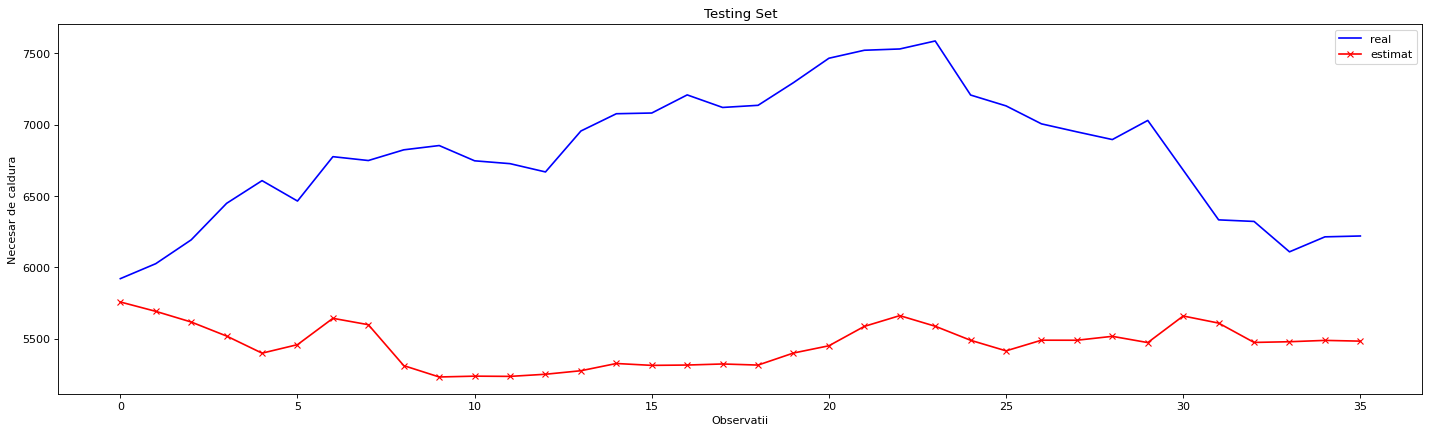

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(22, 6), dpi=80)
plt.plot(y_test, label='real', color='blue')
plt.plot(y_pred_RF_test,label='estimat',color='red',marker='x')
plt.title('Testing Set')
plt.xlabel('Observatii')
plt.ylabel('Necesar de caldura')
plt.legend()
plt.show()

In [ ]:
print("Rezultate RF Testare:")
print('Mean Squared Error (MSE) : ', metrics.mean_squared_error(y_test,y_pred_RF_test))
print('Mean Absolute Error (MAE) : ',metrics.mean_absolute_error(y_test,y_pred_RF_test))
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred_RF_test)),'.3f'))
print("Root Mean Squared Error (RMSE) : ",rmse)

Rezultate RF Testare:
Mean Squared Error (MSE) :  2064503.567786527
Mean Absolute Error (MAE) :  1347.887527777778
Root Mean Squared Error (RMSE) :  1436.838


In [ ]:
#vizualizare arbore decizional
# Extract single tree
estimator = model.estimators_[0]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, max_depth = 5, out_file='tree.dot',
                rounded = True, proportion = False,
                precision = 5, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')